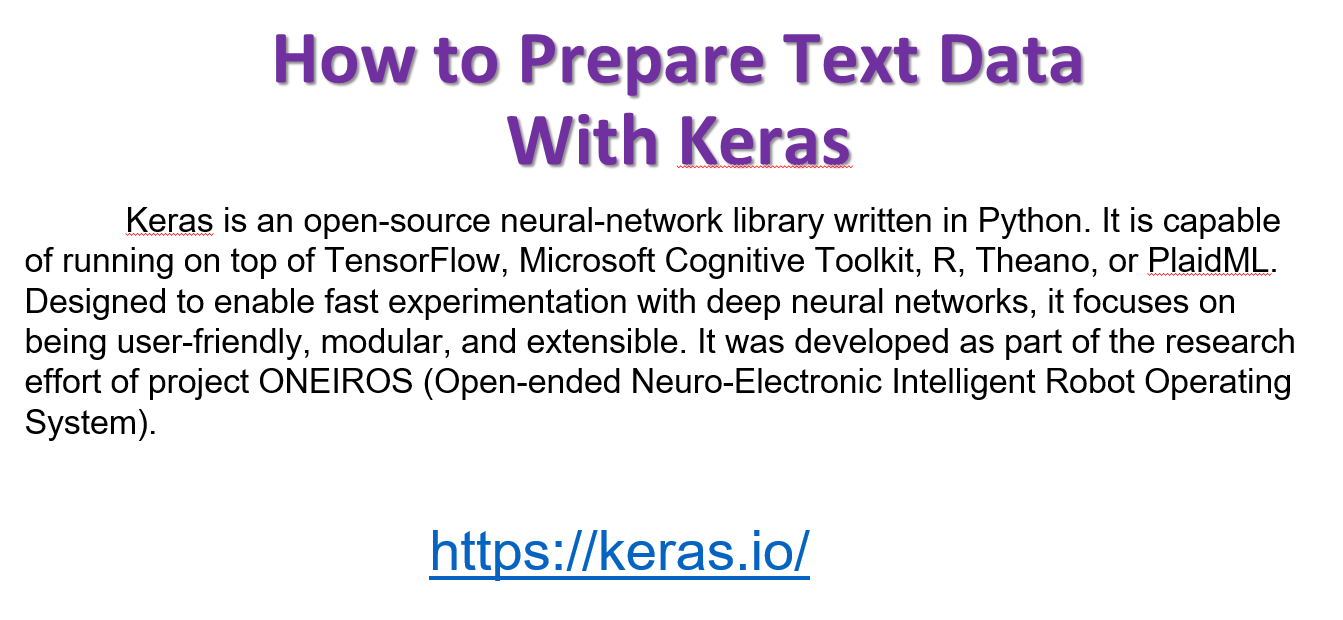

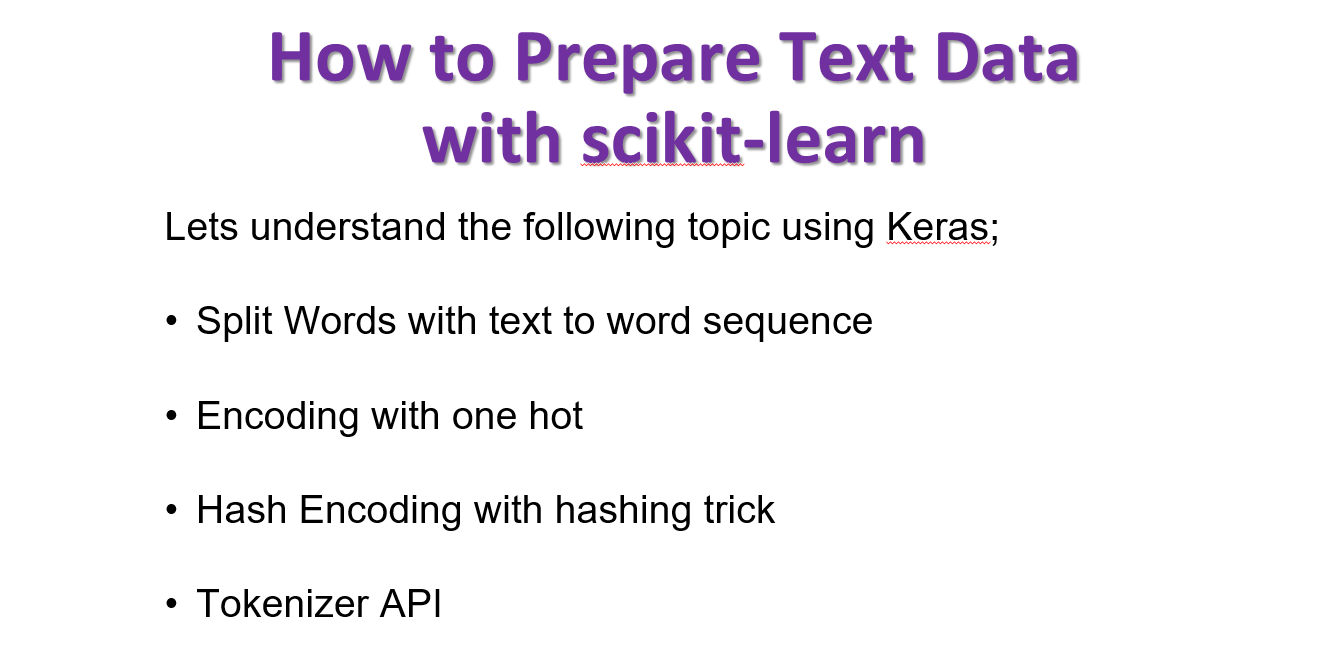

# Data Cleaning with Kears

## Split Words with text to word sequence

A good first step when working with text is to split it into words. Words are called tokens and the process of splitting text into
 tokens is called tokenization. Keras provides the text to word sequence() function that you can use to split text into a list of words.
 Bydefault, this function automatically does 3 things:

 Splits words by space.

 Filters out punctuation.

 Converts text to lowercase (lower=True).

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)


Using TensorFlow backend.


['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


# Encoding with one hot

Keras provides the one hot() function that you can use to tokenize and integer encode a text document in one step. The name suggests that it
will create a one hot encoding of the document, which is not the case. Instead, the function is a wrapper for the hashing trick() function. The function returns an integer encoded version of the document. The use of a hash function means that there may be collisions and not all words will be assigned unique integer values. As with the text to word sequence() function in the previous section, the one hot() function will make  the text lower case, filter out punctuation, and split words based on white space.

Running the example first prints the size of the vocabulary as 8. The encoded document is then printed as an array of integer encoded words.


In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)


8


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[8, 6, 2, 9, 3, 5, 8, 4, 6]


# Hash Encoding with hashing trick

Keras provides the hashing trick() function that tokenizes and then integer encodes the
document, just like the one hot() function. It provides more flexibility, allowing you to specify
the hash function as either hash (the default) or other hash functions such as the built in md5
function or your own function. Below is an example of integer encoding a document using the
md5 hash function

In [ ]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)


8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


# Tokenizer API

Keras provides a more sophisticated API for preparing text that can be fit and reused to prepare multiple text documents. This may be the preferred approach for large projects. Keras provides the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.

In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

 word counts: A dictionary of words and their counts.

 word docs: An integer count of the total number of documents that were used to fit the Tokenizer.

 word index: A dictionary of words and their uniquely assigned integers.

 document count: A dictionary of words and how many documents each appeared in.

In [ ]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


Once the Tokenizer has been fit on training data, it can be used to encode documents in the train or test datasets. The texts to matrix() function on the Tokenizer can be used to create one vector per document provided per input. The length of the vectors is the total size of the vocabulary. This function provides a suite of standard bag-of-words model text encoding schemes that can be provided via a mode argument to the function. The modes available include:

 binary: Whether or not each word is present in the document. This is the default.

 count: The count of each word in the document.

 tfidf: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.

 freq: The frequency of each word as a ratio of words within each document.

In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)


OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
